# 1.. Lets Read data & perform basic analysis !

Bitcoin Price Analysis (2013–2017)
By Linda Mthembu – Data Analyst 

This project explores historical Bitcoin price data from 2013 to 2017 through a full end-to-end exploratory data analysis (EDA). The objective is to understand long-term price movements, short-term volatility, and underlying patterns in Bitcoin market behavior.

The analysis includes:

Data cleaning & preprocessing

Time-series trend analysis

OHLC (Open, High, Low, Close) visualization using candlestick charts

Daily return calculation for volatility measurement

Yearly, quarterly, and monthly price aggregation

Comparative scaling using linear and logarithmic transforms

The project demonstrates practical experience in working with financial time-series data, applying analytical techniques, and creating clear data visualizations.

Tools & Technologies:
Python • Pandas • NumPy • Matplotlib • Seaborn • Plotly • Cufflinks

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objects as go
import plotly.express as px

plt.style.use("seaborn-v0_8-darkgrid")
sns.set_theme(style="darkgrid")


## Loading the Dataset
We load the dataset using a **relative path** so the project works on any machine, including GitHub.


In [11]:
from pathlib import Path
import pandas as pd

DATA_DIR = Path("..") / "data"
csv_path = DATA_DIR / "bitcoin_price_training.csv"

df = pd.read_csv(csv_path)
df.head(3)


,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"


## Initial Data Exploration

We inspect the shape, column types, missing values, and general statistics.


In [ ]:
# ==============================
# Quick data overview
# ==============================
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

df.describe().T


Shape: (1556, 7)

Columns:
 ['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

Data types:
Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

Missing values per column:
Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64


,count,mean,min,25%,50%,75%,max,std
Date,1556,2015-06-14 12:00:00,2013-04-28 00:00:00,2014-05-21 18:00:00,2015-06-14 12:00:00,2016-07-07 06:00:00,2017-07-31 00:00:00,NaN
Open,1556.0,582.625328,68.5,254.2875,438.6,662.4375,2953.22,523.137312
High,1556.0,597.992847,74.56,260.3275,447.56,674.525,2999.91,542.992855
Low,1556.0,567.851446,65.53,248.835,430.57,646.735,2840.53,505.877401
Close,1556.0,584.239396,68.43,254.32,438.855,663.4025,2958.11,525.904442


## Data Preprocessing

Steps performed:
- Convert `Date` to datetime  
- Remove rows with invalid dates  
- Sort dataset in chronological order  
- Check and remove duplicate entries  


In [ ]:


# 1. Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

# 2. Drop rows where Date failed to parse (if any)
df = df.dropna(subset=["Date"])

# 3. Sort by date (oldest → newest)
df = df.sort_values("Date").reset_index(drop=True)

# 4. Check duplicates
dup_count = df.duplicated().sum()
print(f"Number of duplicate rows: {dup_count}")

if dup_count > 0:
    df = df.drop_duplicates().reset_index(drop=True)
    print("Duplicates removed. New shape:", df.shape)
else:
    print("No duplicate rows found.")

# 5. Final dtypes check
df.dtypes


Number of duplicate rows: 0
No duplicate rows found.


Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                object
Market Cap            object
dtype: object

##  OHLC Price Trends Over Time
We visualise **Open, High, Low, Close** values to understand Bitcoin's price movement.


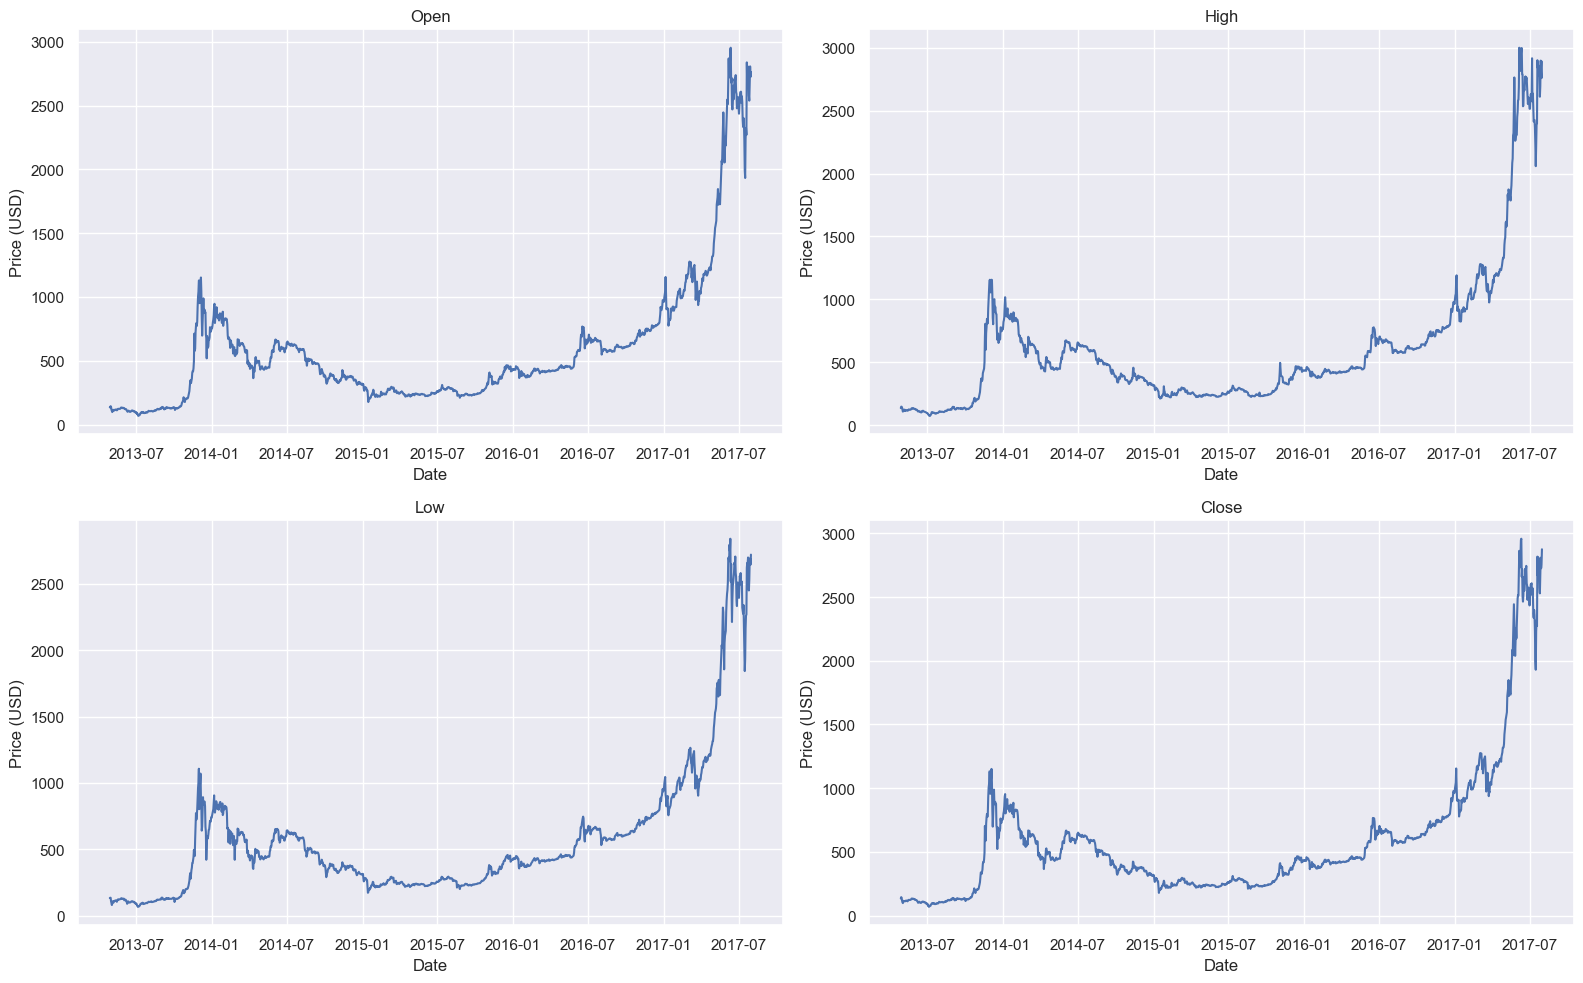

In [26]:

price_cols = ["Open", "High", "Low", "Close"]

plt.figure(figsize=(16, 10))

for i, col in enumerate(price_cols, 1):
    plt.subplot(2, 2, i)
    plt.plot(df["Date"], df[col])
    plt.title(col)
    plt.xlabel("Date")
    plt.ylabel("Price (USD)")

plt.tight_layout()
plt.show()


##  Candlestick Chart (Plotly)

Candlestick charts give a detailed view of Bitcoin's daily price fluctuations.
A 60-day sample is used for performance and clarity.


In [ ]:


sample = df.tail(60)  # last 60 days

fig = go.Figure(
    data=[
        go.Candlestick(
            x=sample["Date"],
            open=sample["Open"],
            high=sample["High"],
            low=sample["Low"],
            close=sample["Close"],
            name="BTC"
        )
    ]
)

fig.update_layout(
    title="Bitcoin OHLC – Recent Period (Sample)",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    xaxis_rangeslider_visible=False,
    template="plotly_dark",
    height=600,
)

fig.show()


##  Closing Price: Linear vs Logarithmic Scale

Log scale is useful when data spans large ranges (high volatility).


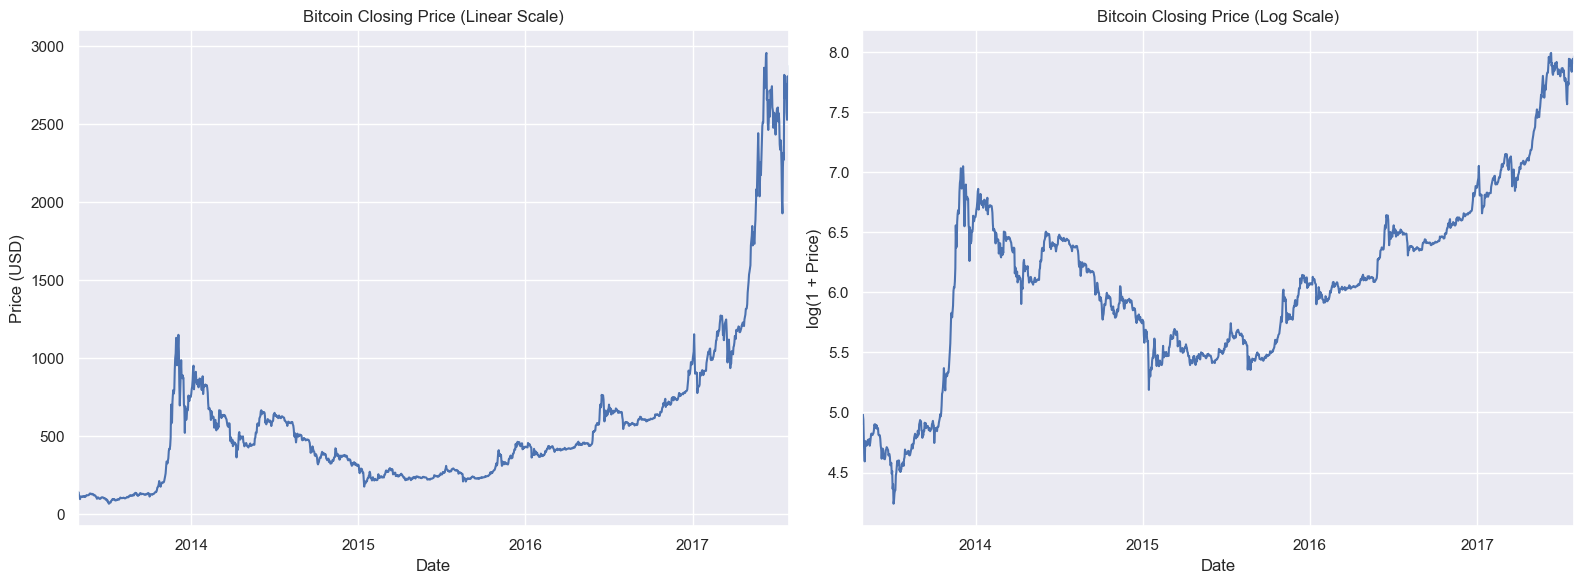

In [27]:

data = df.copy()
data = data.set_index("Date")

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
data["Close"].plot()
plt.title("Bitcoin Closing Price (Linear Scale)")
plt.ylabel("Price (USD)")

plt.subplot(1, 2, 2)
np.log1p(data["Close"]).plot()
plt.title("Bitcoin Closing Price (Log Scale)")
plt.ylabel("log(1 + Price)")

plt.tight_layout()
plt.show()


## Resampling: Yearly, Quarterly, Monthly Trends

Resampling helps identify long-term patterns and seasonality.


C:\Users\LindaMthembu\AppData\Local\Temp\ipykernel_28028\923126370.py:4: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

C:\Users\LindaMthembu\AppData\Local\Temp\ipykernel_28028\923126370.py:8: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.

C:\Users\LindaMthembu\AppData\Local\Temp\ipykernel_28028\923126370.py:12: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



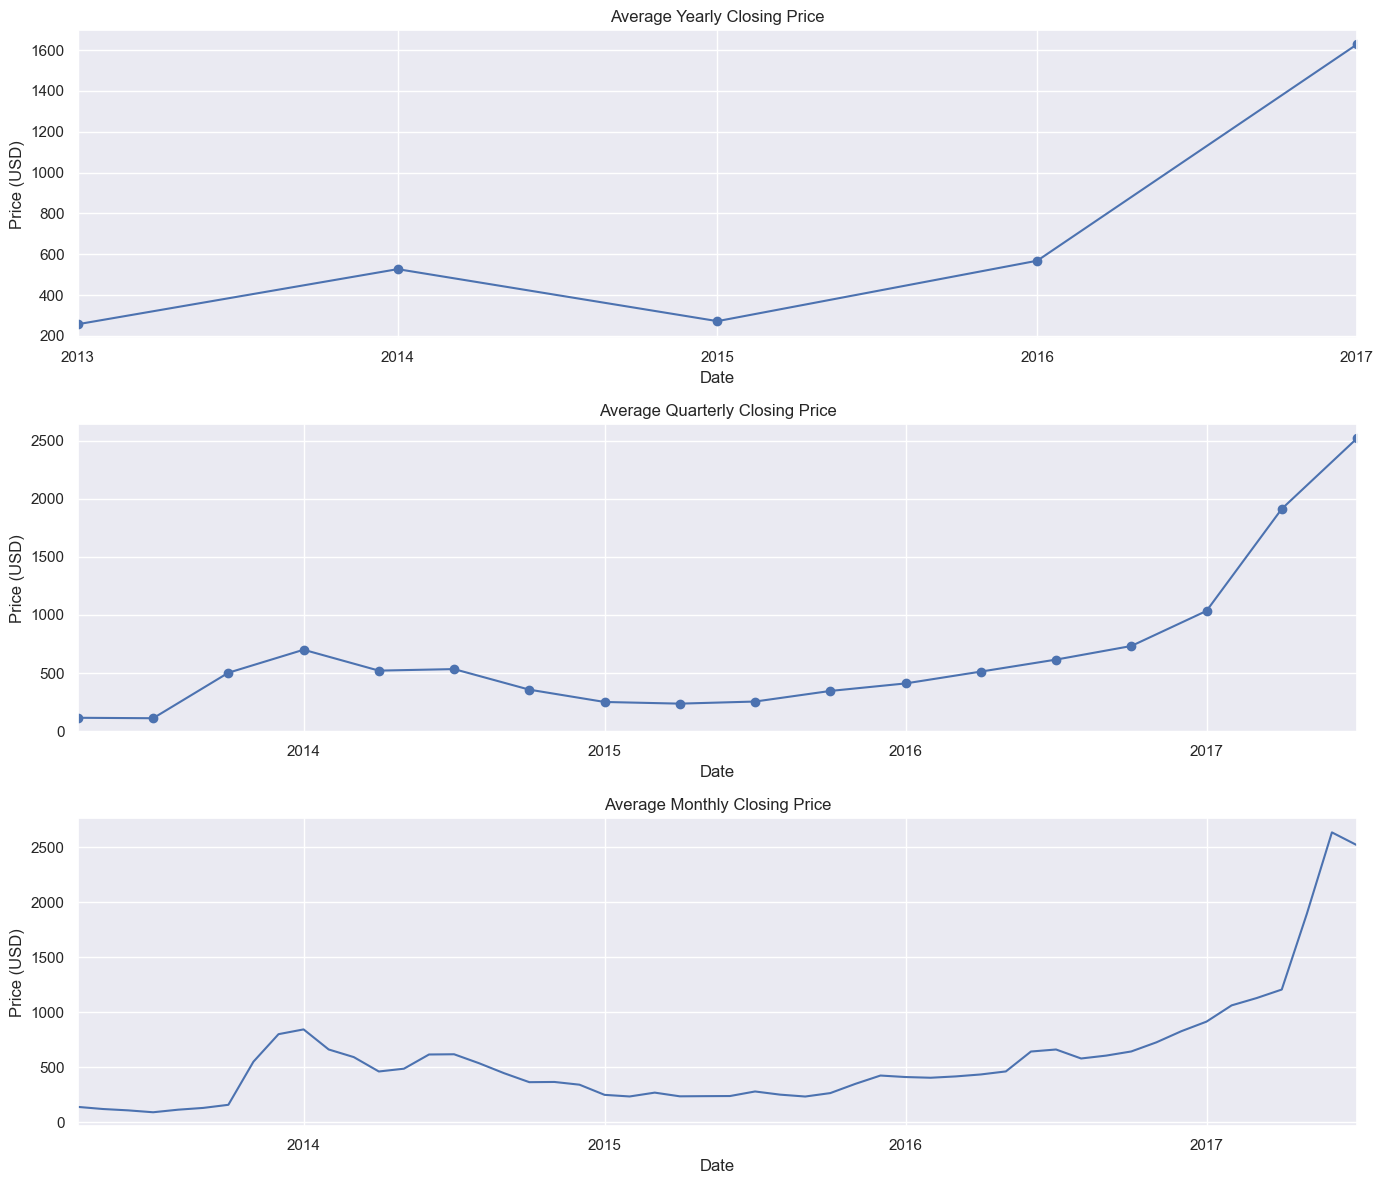

In [28]:
fig, axes = plt.subplots(3, 1, figsize=(14, 12), sharex=False)

# Yearly
data["Close"].resample("Y").mean().plot(ax=axes[0], marker="o")
axes[0].set_title("Average Yearly Closing Price")

# Quarterly
data["Close"].resample("Q").mean().plot(ax=axes[1], marker="o")
axes[1].set_title("Average Quarterly Closing Price")

# Monthly
data["Close"].resample("M").mean().plot(ax=axes[2])
axes[2].set_title("Average Monthly Closing Price")

for ax in axes:
    ax.set_ylabel("Price (USD)")

plt.tight_layout()
plt.show()


## Daily Percentage Change in Closing Price

This highlights Bitcoin's day-to-day volatility.


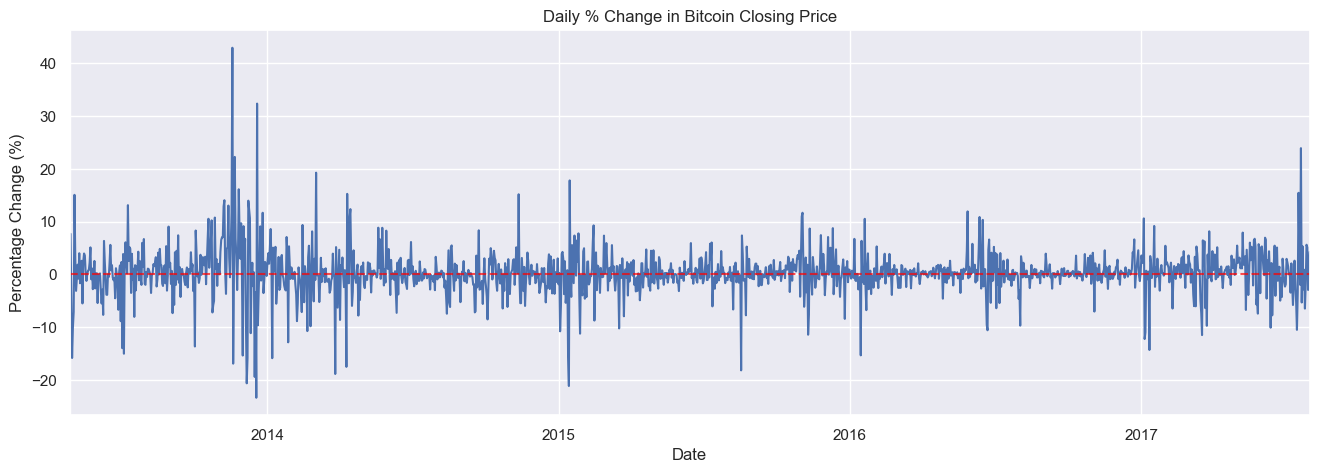

count    1555.000000
mean        0.287807
std         4.272054
min       -23.371254
25%        -1.097338
50%         0.191877
75%         1.805726
max        42.968036
Name: Close_pct_change, dtype: float64

In [29]:
data["Close_pct_change"] = data["Close"].pct_change() * 100

plt.figure(figsize=(16, 5))
data["Close_pct_change"].plot()
plt.title("Daily % Change in Bitcoin Closing Price")
plt.ylabel("Percentage Change (%)")
plt.xlabel("Date")
plt.axhline(0, color="red", linestyle="--", alpha=0.7)
plt.show()

data["Close_pct_change"].describe()


## Project Summary

In this project, I:

- Loaded and cleaned Bitcoin historical price data (2013–2017)  
- Converted and validated time-series data using `datetime`  
- Visualised **Open, High, Low, Close** prices over time  
- Compared closing price on **linear vs log scale** to better understand volatility  
- Resampled prices on **yearly, quarterly, and monthly** levels to observe long-term trends  
- Calculated and plotted the **daily percentage change in closing price** to analyse day-to-day risk  

This project showcases my ability to work with **time-series data**, perform **EDA**, and build clear,
insightful **data visualisations** using Python.


